In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import re

In [2]:
test = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-05-05\US Foods Update.csv')

In [3]:
test.head()

,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Vendor,Brand,Brand Type,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Year Week,LB Current
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED APPETIZERS,"APPETIZERS, VEGETABLES OTHER, BREADED & BATTERED",10750947016097,90009498,5903991,...,MCCAIN FOODS USA,MONARCH,Exclusive Brand,-,-,-,-,-,202308,12.00
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,"HANDHELD, FROZEN & REF","SANDWICHES, FROZEN",10072714106887,4702841,4862793,...,MCCAIN FOODS USA,MCCAIN,National Brand,-,-,-,-,-,202313,75.00
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202305,96.00
3,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202306,360.00
4,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202307,168.00


In [2]:
%%time

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_df = pd.DataFrame()

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for filename in files:
        # Get the full path of the file
        file_path = os.path.join(root, filename)

        #look for all files with US Foods and .csv in title
        pattern = r'.*US Foods Update.*\.csv$'

        if re.search(pattern, filename):
            # Read the CSV file into a temporary dataframe
            df_temp = pd.read_csv(file_path)

            #if not empty dataframe
            if not all_df.empty:
                #if column named "Year Week" found then only keep weeks that are not in main data file
                if 'Year Week' in df_temp:
                    unique_dates = all_df['Year Week'].unique()
                    df_temp = df_temp[df_temp['Year Week'].isin(unique_dates) == False]
                else:
                    df_temp = pd.DataFrame()
            
            # Concatenate the filtered data into the main dataframe
            if len(df_temp) > 0:
                all_df = pd.concat([all_df, df_temp], ignore_index=True)

print(all_df.shape)
all_df.head(4)

(641691, 25)
CPU times: total: 43.3 s
Wall time: 45.7 s


,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Brand Type,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Year Week,LB Current,Director,Desk
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED FROZEN POTATOES,"POTATOES, FORMED PRODUCTS FROZEN",10072714937580,1252567,6512164,...,National Brand,Quality: GOOD,POTATO SUB CATEGORY: WHITE,POTATO CUT TYPE: ALL OTHER POTATO,POTATO CUT DESCRIPTION: CHOPPED AND FORMED,-,202109,36.00,NaN,NaN
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202103,430.00,NaN,NaN
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202104,20.00,NaN,NaN
3,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202107,20.00,NaN,NaN


In [3]:
data_dict = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Distributor Sell-Out Dictionaries\US Foods - US.xlsx', 
                          sheet_name='SKU Mapping')

time_dict = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Distributor Sell-Out Dictionaries\Time Definitions.xlsx', 
                          sheet_name='time')

data_dict.head(3)

,Merch Cat#,Merch Category,PIM Grp#,PIM Group,Manufacturer Item Number,Product,Pack Size,Vend#,Vendor,Brand,Consolidated Category,L1 Product Hierarchy,L2 Product Hierarchy,McCain SKU ID
0,76.0,COOKIES,1433.0,"COOKIES, READY TO EAT, FROZEN",10072714003742,"COOKIE, SNDWH CHOC VNL CRM",6/4 LB,30.0,MCCAIN FOODS USA,MCCAIN,Prepared Foods,Local Portfolio,Bakery,1000004861
1,76.0,COOKIES,1433.0,"COOKIES, READY TO EAT, FROZEN",10072714006040,"COOKIE, SNDWH CHOC VNL CRM",6/4 LB,30.0,MCCAIN FOODS USA,SONIC,Prepared Foods,Local Portfolio,Bakery,1000007909
2,97.0,DESSERT BARS,1518.0,"BROWNIES, FROZEN",10072714105224,"BROWNIE, DBL CHOC NOT ICED",2/64 OZ,30.0,MCCAIN FOODS USA,MCCAIN,Prepared Foods,Local Portfolio,Bakery,15010522


In [4]:
dict_columns = ['Manufacturer Item Number','McCain SKU ID']
time_columns = ['Calendar Week Year','Week Ending (Sun)']

df_sellout = all_df.merge(data_dict[dict_columns], how='left', left_on=['MFG #'], right_on=['Manufacturer Item Number'])

df_sellout = df_sellout.merge(time_dict[time_columns], how='left', left_on=['Year Week'], right_on=['Calendar Week Year'])

df_sellout.head(3)

,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Attribute 4,Attribute 5,Year Week,LB Current,Director,Desk,Manufacturer Item Number,McCain SKU ID,Calendar Week Year,Week Ending (Sun)
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED FROZEN POTATOES,"POTATOES, FORMED PRODUCTS FROZEN",10072714937580,1252567,6512164,...,POTATO CUT DESCRIPTION: CHOPPED AND FORMED,-,202109,36.00,NaN,NaN,10072714937580,MCF03758,202109,2021-03-07
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,-,-,202103,430.00,NaN,NaN,50758108767183,1000006237,202103,2021-01-24
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,-,-,202104,20.00,NaN,NaN,50758108767183,1000006237,202104,2021-01-31


In [5]:
df.loc[~df['McCain SKU ID'].isna(), 'match'] = 1
df.loc[df['McCain SKU ID'].isna(), 'match'] = 0

<AxesSubplot:xlabel='match'>

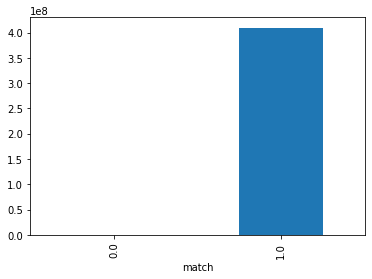

In [6]:
#matches any character that is not a digit (\d) or a period (.)
df.loc[:, 'LBS'] = df['LB Current'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))

df.groupby(['match'])['LBS'].sum().plot(kind='bar')

In [8]:
df_sellout.columns

Index(['Region', 'Area', 'Market', 'Pyramid Segment', 'Business Unit',
       'Merch Category', 'PIM Group', 'MFG #', 'PIM #', 'ASYS #',
       'Product Description', 'Pack Size', 'Vendor #', 'Vendor', 'Brand',
       'Brand Type', 'Attribute 1', 'Attribute 2', 'Attribute 3',
       'Attribute 4', 'Attribute 5', 'Year Week', 'LB Current', 'Director',
       'Desk', 'Manufacturer Item Number', 'McCain SKU ID',
       'Calendar Week Year', 'Week Ending (Sun)'],
      dtype='object')

In [11]:
print(df_sellout.shape)
df_sellout['Week Ending (Sun)'].agg(['min','max'])

(641691, 29)


min   2021-01-24
max   2023-06-18
Name: Week Ending (Sun), dtype: datetime64[ns]

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


graph_data = df_sellout.groupby('Week Ending (Sun)')['LB Current'].sum().reset_index()

# Convert week ending dates to datetime objects
graph_data['Week Ending (Sun)'] = pd.to_datetime(graph_data['Week Ending (Sun)'])

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Create the line chart
ax.plot(graph_data['Week Ending (Sun)'], graph_data['LB Current'])

# Set the x-axis label
ax.set_xlabel('Week Ending Dates')

# Set the y-axis label
ax.set_ylabel('Volume')

# Set the chart title
ax.set_title('Volume Trend')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

KeyboardInterrupt: 

## Save Sell-Out Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611379 entries, 0 to 611378
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Region                    603195 non-null  object        
 1   Area                      603195 non-null  object        
 2   Market                    611379 non-null  object        
 3   Pyramid Segment           611379 non-null  object        
 4   Business Unit             611379 non-null  object        
 5   Merch Category            611379 non-null  object        
 6   PIM Group                 611379 non-null  object        
 7   MFG #                     611379 non-null  int64         
 8   PIM #                     611379 non-null  int64         
 9   ASYS #                    611379 non-null  int64         
 10  Product Description       611379 non-null  object        
 11  Pack Size                 611379 non-null  object        
 12  Ve

In [5]:
df_sellout.to_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Data Update\files\usfoods_sellout.csv', index=False)

In [32]:
orders = pd.read_pickle(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Trade Claims Deductions\ref\sales.pkl')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129898 entries, 0 to 3129897
Data columns (total 34 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   day_calendar_date         datetime64[ns]
 1   month_begin               datetime64[ns]
 2   month_id                  object        
 3   sales_order_id            object        
 4   po_number                 object        
 5   material_id               object        
 6   material_desc             object        
 7   category                  object        
 8   customer_material_id      object        
 9   plant_id                  object        
 10  plant_name                object        
 11  sold_to_id                object        
 12  sold_to_name              object        
 13  currency_id               object        
 14  netprice                  float32       
 15  sales_organisation_id     object        
 16  sold_to_l1_id             object        
 17  sold_to_

In [44]:
import datetime

def fiscal_quarter(x):
    if x >= 7 and x <= 9:
        return 1
    elif x >= 10 and x <= 12:
        return 2
    elif x >= 1 and x <= 3:
        return 3
    elif x >= 4 and x <= 6:
        return 4

orders = orders[(orders['sold_to_l1']=='US FOODS L1') & (orders['sales_organisation_id']=='US01')]

orders['year'] = orders['month_begin'].dt.year
orders['month'] = orders['month_begin'].dt.month

orders['day_calendar_date'] = pd.to_datetime(orders['day_calendar_date'])

orders['week_ending_sunday'] = orders['day_calendar_date'].apply(lambda x: x + pd.to_timedelta((6 - x.weekday()) % 7, unit='d'))

orders['fiscal_year'] = orders.apply(lambda x: x['year'] + 1 if x['month'] > 6 else x['year'], axis=1)
orders['fiscal_period'] = orders.apply(lambda x: x['month'] - 6 if x['month'] > 6 else x['month'] + 6, axis=1)
orders['fiscal_quarter'] = orders['month'].apply(fiscal_quarter)

orders.head()

,day_calendar_date,month_begin,month_id,sales_order_id,po_number,material_id,material_desc,category,customer_material_id,plant_id,...,shortedquantitycs,totalvalue,totalshortvalue,netcostlc,year,month,fiscal_year,fiscal_period,fiscal_quarter,week_ending_sunday
35,2020-01-01,2020-01-01,202001,6072209,1031905D,1000001542,MCCAIN SIGNATURE 3/8 SC SKIN ON 6X5,Potato,7141364,2252,...,0.0,24422.400391,0.0,13485.570312,2020,1,2020,7,3,2020-01-05
743,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000001467,GCP BRD CD CHS POT BITES 4X3LB,Prepared Foods,9865114,2110,...,0.0,64.260002,0.0,34.330002,2020,1,2020,7,3,2020-01-05
744,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000002997,D_CRW BRB THCK ON RINGS 6/2.5,Prepared Foods,7862756,2110,...,0.0,193.100006,0.0,157.330002,2020,1,2020,7,3,2020-01-05
745,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000007587,USF 5/16 XL BEER FRIES 6X5LB,Potato,7731531,2110,...,0.0,5918.399902,0.0,2160.969971,2020,1,2020,7,3,2020-01-05
746,2020-01-02,2020-01-01,202001,6058462,9618554Q,40010016,MOR TAN 1/8 BRD ON SLVRS 6X2LB,Prepared Foods,7364995,2110,...,0.0,2816.100098,0.0,1196.410034,2020,1,2020,7,3,2020-01-05


In [46]:
orders.columns

Index(['day_calendar_date', 'month_begin', 'month_id', 'sales_order_id',
       'po_number', 'material_id', 'material_desc', 'category',
       'customer_material_id', 'plant_id', 'plant_name', 'sold_to_id',
       'sold_to_name', 'currency_id', 'netprice', 'sales_organisation_id',
       'sold_to_l1_id', 'sold_to_l1', 'sold_to_l2_id', 'sold_to_l2', 'on_tos',
       'route', 'ship_to_zone', 'orderedquantitycs', 'confirmedquantitycs',
       'orderedquantitylb', 'orderedquantitygrosslb', 'deliveredquantitycs',
       'deliveredquantitylb', 'deliveredquantitygrosslb', 'shortedquantitycs',
       'totalvalue', 'totalshortvalue', 'netcostlc', 'year', 'month',
       'fiscal_year', 'fiscal_period', 'fiscal_quarter', 'week_ending_sunday'],
      dtype='object')

In [36]:
orders['sold_to_name'].value_counts()

sold_to_name
US FOODS FORT MILL        8567
US FOODS GREENSBURG       7492
US FOODS ATLANTA          5942
US FOODS COLUMBIA         5827
US FOODS SAN FRANCISCO    5806
                          ... 
US FOODS ANCHORAGE         519
US FOODS SAN DIEGO         511
US FOODS LUBBOCK           416
US FOODS SIOUX FALLS       305
USF NEW ORLEANS             28
Name: count, Length: 72, dtype: int64

In [37]:
orders['category'].value_counts()

category
Potato            103643
Prepared Foods     80021
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


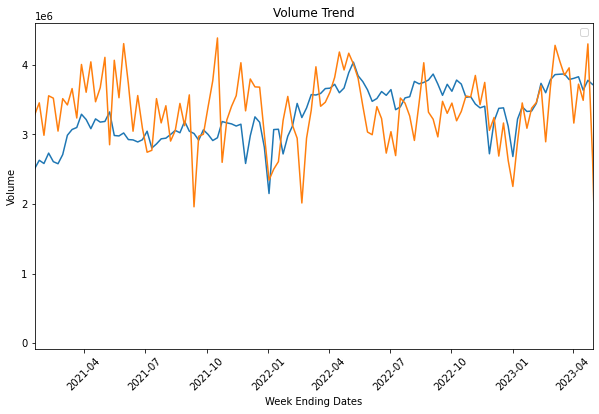

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

graph_data1 = df.groupby('Week Ending (Sun)')['LBS'].sum().reset_index()
graph_data2 = orders.groupby('week_ending_sunday')['deliveredquantitylb'].sum().reset_index()
# Convert week ending dates to datetime objects
graph_data1['Week Ending (Sun)'] = pd.to_datetime(graph_data1['Week Ending (Sun)'])

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Create the line chart
ax.plot(graph_data1['Week Ending (Sun)'], graph_data1['LBS'])
ax.plot(graph_data2['week_ending_sunday'], graph_data2['deliveredquantitylb'])

# Set the x-axis label
ax.set_xlabel('Week Ending Dates')

ax.set_xlim(graph_data1['Week Ending (Sun)'].min(), graph_data1['Week Ending (Sun)'].max())

# Set the y-axis label
ax.set_ylabel('Volume')

# Set the chart title
ax.set_title('Volume Trend')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [2]:
test = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-02\US Foods Inv\21 May 2023.xlsx')

test.head()

,Market,Area,Region,ASYS Number,Product,Reserved Quantity,Manufacturer Item Number,Manufacturer GTIN,Brand Name,Inventory on Hand,Inventory on Order,Days of Inventory,Weekly Forecast,13 Week Forecast
0,ALBANY,UPSTATE NEW YORK,NORTHEAST,348698,"POTATO, FF 3/8 CC LINE FLO",0.0,30,10072714180504,GOLDEN FRY,13,10,25,10,30
1,ALBANY,UPSTATE NEW YORK,NORTHEAST,659771,"POTATO, FF SWT 7/16 CC XLF",6.0,30,10072714945660,MCCAIN,101,36,43,24,60
2,ALBANY,UPSTATE NEW YORK,NORTHEAST,747410,"POTATO, FF 3/8 SC LINE",3.0,0,50758108109693,VALUE WAY,428,490,32,140,140
3,ALBANY,UPSTATE NEW YORK,NORTHEAST,987149,"POTATO, SKN MED 200 CT BKD FZN",0.0,30,10072714036023,MCCAIN,7,10,36,0,20
4,ALBANY,UPSTATE NEW YORK,NORTHEAST,1009467,"APPETIZER, CLFWR PKLD FLORT",0.0,30,10072714008204,VDGZ,14,0,650,0,0


In [4]:
test.shape

(2820, 14)

In [54]:
import datetime
import os

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_inv = pd.DataFrame()

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for filename in files:
        # Get the full path of the file
        file_path = os.path.join(root, filename)

        '''
        \d{2}: Matches exactly two digits (in this case, the day).
        \s: Matches a single whitespace character.
        (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec): Non-capturing group that matches any three-letter month abbreviation, representing January to December.
        \s: Matches a single whitespace character.
        \d{4}: Matches exactly four digits (in this case, the year).
        '''

        #look for all files with US Foods and .csv in title
        pattern = r'\d{2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{4}'
        
        if re.search(pattern, filename):
            # Read the CSV file into a temporary dataframe
            df_temp = pd.read_excel(file_path)
            
            filename_str = os.path.splitext(filename)[0]

            date_str = datetime.datetime.strptime(filename_str, "%d %b %Y").date()

            df_temp['Date'] = date_str

            # Concatenate the filtered data into the main dataframe
            if len(df_temp) > 0:
                all_inv = pd.concat([all_inv, df_temp], ignore_index=True)

print(all_inv.shape)
all_inv.head(4)

(412593, 15)


,Market,Area,Region,ASYS Number,Product,Reserved Quantity,Manufacturer Item Number,Manufacturer GTIN,Brand Name,Inventory on Hand,Inventory on Order,Days of Inventory,Weekly Forecast,13 Week Forecast,Date
0,ALBANY,UPSTATE NEW YORK,NORTHEAST,348698,"POTATO, FF 3/8 CC LINE FLO",0.0,30,10072714180504,GOLDEN FRY,22,10,38,0,30,2023-02-01
1,ALBANY,UPSTATE NEW YORK,NORTHEAST,659771,"POTATO, FF SWT 7/16 CC XLF",18.0,30,10072714945660,MCCAIN,161,108,37,0,324,2023-02-01
2,ALBANY,UPSTATE NEW YORK,NORTHEAST,747410,"POTATO, FF 3/8 SC LINE",25.0,0,50758108109693,VALUE WAY,277,0,13,420,420,2023-02-01
3,ALBANY,UPSTATE NEW YORK,NORTHEAST,987149,"POTATO,SKN MED 200 CT BKD FZN",0.0,30,10072714036023,MCCAIN,0,13,30,0,14,2023-02-01


In [55]:
dict_columns = ['Manufacturer Item Number','McCain SKU ID']
time_columns = ['Calendar Week Year','Week Ending (Sun)']

all_inv = all_inv.drop(columns=['Manufacturer Item Number']).merge(data_dict[dict_columns], how='left', left_on=['Manufacturer GTIN'], right_on=['Manufacturer Item Number'])

all_inv['Date'] = pd.to_datetime(all_inv['Date'])

all_inv['Week Ending Date'] = pd.to_datetime(all_inv['Date'] + pd.offsets.Week(weekday=6))

all_inv.head(3)

,Market,Area,Region,ASYS Number,Product,Reserved Quantity,Manufacturer GTIN,Brand Name,Inventory on Hand,Inventory on Order,Days of Inventory,Weekly Forecast,13 Week Forecast,Date,Manufacturer Item Number,McCain SKU ID,Week Ending Date
0,ALBANY,UPSTATE NEW YORK,NORTHEAST,348698,"POTATO, FF 3/8 CC LINE FLO",0.0,10072714180504,GOLDEN FRY,22,10,38,0,30,2023-02-01,1.007271e+13,GFR50,2023-02-05
1,ALBANY,UPSTATE NEW YORK,NORTHEAST,659771,"POTATO, FF SWT 7/16 CC XLF",18.0,10072714945660,MCCAIN,161,108,37,0,324,2023-02-01,1.007271e+13,MCF04566,2023-02-05
2,ALBANY,UPSTATE NEW YORK,NORTHEAST,747410,"POTATO, FF 3/8 SC LINE",25.0,50758108109693,VALUE WAY,277,0,13,420,420,2023-02-01,5.075811e+13,1000006539,2023-02-05


In [50]:
import pyodbc

def run_prod_query(query_str):
    server = 'azure-synapse-workspace-01-prod.sql.azuresynapse.net'
    database = 'GDASQLPool01PROD'
    driver= '{ODBC Driver 17 for SQL Server}'
    active = 'ActiveDirectoryIntegrated'

    cnxn = pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';Authentication='+active)

    print(dt.now())

    data = pd.read_sql(query_str,cnxn)
    
    return data

query_str = '''
SELECT [Product Short Code]
,[Category]
,[Net Weight]
,[Weight Uom]
FROM [BI].[DimProduct]
'''

products = run_prod_query(query_str).rename(columns={'Product Short Code':'McCain SKU ID'})


2023-06-15 09:16:52.328099


C:\Users\newatter\AppData\Local\Temp\1\ipykernel_14676\2252028261.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query_str,cnxn)


In [56]:
all_inv = all_inv.merge(products, how='left', on=['McCain SKU ID'])

all_inv.loc[~all_inv['Category'].isna(), 'Consolidated Category'] = all_inv['Category'].astype('str').apply(lambda x: 'Potato' if 'Potato' in x else 'Prepared Foods')

#include dimensions from sellout data
usfoods_product = df_sellout.groupby(['McCain SKU ID','Merch Category', 'PIM Group','Brand','Brand Type']).size().drop(columns={0}).reset_index()

all_inv = all_inv.merge(usfoods_product, how='left', on=['McCain SKU ID'])

all_inv.head()


In [72]:
all_inv.to_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Data Update\files\usfoods_inventory.csv', index=False)

## Share Report

In [83]:
test1 = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-09\US Foods Fair Share 13.csv')
test2 = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-09\US Foods Fair Share 26.csv')
test3 = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-09\US Foods Fair Share 52.csv')

test.head()

,Merch Category,Region,Area,Market,Pyramid Segment,Brand Type,PIM Group,LB Category Previous,LB Category Current,LB Vendor Previous,LB Vendor Current,Share Previous,Share Current,Fair Share Opportunity Previous,Fair Share Opportunity Current
0,"CARRY OUT, PLASTIC",CENTRAL,DAKOTAS,BISMARCK,EDUCATION,Exclusive Brand,"CARRY-OUT CONTAINER, PLASTIC, DISPOSABLE",76.42,56.16,0.0,0.0,0.00%,0.00%,0.0,0.0
1,"CARRY OUT, PLASTIC",CENTRAL,DAKOTAS,BISMARCK,EDUCATION,Exclusive Brand,"CARRY-OUT CONTAINER, PLASTIC, HINGED",64.81,219.57,0.0,0.0,0.00%,0.00%,0.0,0.0
2,"CARRY OUT, PLASTIC",CENTRAL,DAKOTAS,BISMARCK,EDUCATION,National Brand,"CARRY-OUT CONTAINER, PLASTIC, HINGED",0.00,15.88,0.0,0.0,-,0.00%,0.0,0.0
3,"CARRY OUT, PLASTIC",CENTRAL,DAKOTAS,BISMARCK,EDUCATION,National Brand,"TRAYS, PLASTIC, DISPOSABLE",8.20,0.00,0.0,0.0,0.00%,-,0.0,0.0
4,"CARRY OUT, PLASTIC",CENTRAL,DAKOTAS,BISMARCK,GOVERNMENT,Exclusive Brand,"CARRY-OUT CONTAINER, PLASTIC, HINGED",0.00,32.88,0.0,0.0,-,0.00%,0.0,0.0


In [75]:
test.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous',
       'LB Category Current', 'LB Vendor Previous', 'LB Vendor Current',
       'Share Previous', 'Share Current', 'Fair Share Opportunity Previous',
       'Fair Share Opportunity Current'],
      dtype='object')

In [84]:
import regex as re

columns = ['LB Category Current', 'LB Vendor Previous', 'LB Vendor Current','Fair Share Opportunity Previous','Fair Share Opportunity Current']

for column in columns:
    test1[column] = test1[column].astype(str).apply(lambda x: float(re.sub(r',', '', re.sub('-', '0', x))))
    test2[column] = test2[column].astype(str).apply(lambda x: float(re.sub(r',', '', re.sub('-', '0', x))))
    test3[column] = test3[column].astype(str).apply(lambda x: float(re.sub(r',', '', re.sub('-', '0', x))))

#test.info()

In [85]:
test1.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous',
       'LB Category Current', 'LB Vendor Previous', 'LB Vendor Current',
       'Share Previous', 'Share Current', 'Fair Share Opportunity Previous',
       'Fair Share Opportunity Current'],
      dtype='object')

In [87]:
test1.rename(columns={'LB Category Current':'LB Category Current 13', 
                      'LB Vendor Previous':'LB Vendor Previous 13', 
                      'LB Vendor Current':'LB Vendor Previous 13',
                      'Fair Share Opportunity Previous':'Fair Share Opportunity Previous 13',
                      'Fair Share Opportunity Current':'Fair Share Opportunity Previous 13'}, inplace=True)

test2.rename(columns={'LB Category Current':'LB Category Current 26', 
                      'LB Vendor Previous':'LB Vendor Previous 26', 
                      'LB Vendor Current':'LB Vendor Previous 26',
                      'Fair Share Opportunity Previous':'Fair Share Opportunity Previous 26',
                      'Fair Share Opportunity Current':'Fair Share Opportunity Previous 26'}, inplace=True)

test3.rename(columns={'LB Category Current':'LB Category Current 52', 
                      'LB Vendor Previous':'LB Vendor Previous 52', 
                      'LB Vendor Current':'LB Vendor Previous 52',
                      'Fair Share Opportunity Previous':'Fair Share Opportunity Previous 52',
                      'Fair Share Opportunity Current':'Fair Share Opportunity Previous 52'}, inplace=True)



In [89]:
merge_columns = ['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group']

t = test1.merge(test2, how='left', on=merge_columns)

t.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous_x',
       'LB Category Current 13', 'LB Vendor Previous 13',
       'LB Vendor Previous 13', 'Share Previous_x', 'Share Current_x',
       'Fair Share Opportunity Previous 13',
       'Fair Share Opportunity Previous 13', 'LB Category Previous_y',
       'LB Category Current 26', 'LB Vendor Previous 26',
       'LB Vendor Previous 26', 'Share Previous_y', 'Share Current_y',
       'Fair Share Opportunity Previous 26',
       'Fair Share Opportunity Previous 26'],
      dtype='object')

In [82]:
test[test['LB Vendor Current']>0].head()

,Merch Category,Region,Area,Market,Pyramid Segment,Brand Type,PIM Group,LB Category Previous,LB Category Current,LB Vendor Previous,LB Vendor Current,Share Previous,Share Current,Fair Share Opportunity Previous,Fair Share Opportunity Current
5745,"CATERWARE, DISPOSABLE",WEST,CASCADE MOUNTAIN,PORTLAND,EDUCATION,National Brand,"BOWLS, PLASTIC, DISPOSABLE",11.02,192.09,0.0,7.34,0.00%,3.82%,0.0,0.0
10719,CULTURED DAIRY,CENTRAL,DAKOTAS,GRAND FORKS,INDEPENDENT RESTAURATEURS,National Brand,"DIPS, DAIRY, FROZEN",0.00,13.50,0.0,13.50,-,100.00%,0.0,0.0
10749,CULTURED DAIRY,CENTRAL,GREAT PLAINS,GRAND ISLAND,HOSPITALITY,National Brand,"DIPS, DAIRY, FROZEN",0.00,27.00,0.0,27.00,-,100.00%,0.0,0.0
10754,CULTURED DAIRY,CENTRAL,GREAT PLAINS,GRAND ISLAND,INDEPENDENT RESTAURATEURS,National Brand,"DIPS, DAIRY, FROZEN",364.50,418.50,364.5,418.50,100.00%,100.00%,0.0,0.0
10770,CULTURED DAIRY,CENTRAL,GREAT PLAINS,KANSAS CITY,EDUCATION,National Brand,"DIPS, DAIRY, FROZEN",16.00,45.50,0.0,13.50,0.00%,29.67%,0.0,0.0


In [91]:
import datetime
import os

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_share = pd.DataFrame()

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for filename in files:
        # Get the full path of the file
        file_path = os.path.join(root, filename)

        print(root)
        #look for all files with US Foods and .csv in title
        #pattern = r'.*US Foods Fair Share 13.*\.csv$'
        
        #if re.search(pattern, filename):
            # Read the CSV file into a temporary dataframe
        #    df_temp1 = pd.read_excel(file_path)
            
        #    filename_str = os.path.splitext(filename)[0]

        #    date_str = datetime.datetime.strptime(filename_str, "%d %b %Y").date()
        
        #    df_temp['Date'] = date_str

            # Concatenate the filtered data into the main dataframe
        #    if len(df_temp) > 0:
        #        all_inv = pd.concat([all_inv, df_temp], ignore_index=True)

#print(all_inv.shape)
#all_inv.head(4)

C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2021-01-29
C:\Users\newatter\OneDrive - McCain Foo

In [104]:
test_str = r'McCain Foods Limited\Weekly Update Files\2023-06-16\US Foods Inv'

pattern = r'\d{4}-\d{2}-\d{2}'

date_str = re.search(pattern, test_str)[0]

adate = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

week_end = pd.to_datetime(adate - pd.offsets.Week(weekday=6))

print(week_end)

2023-06-11 00:00:00


Timestamp('2023-06-11 00:00:00')